In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
%matplotlib inline

# Exact solution

In [9]:
 # Code for the exact solution
def exact_solution(mass,beta,v0,alpha,tmin,tmax,NGrid):
    # mass: mass of the object
    # beta: drag coefficient
    # v0: initial speed
    # alpha: lunch angle
    # tmin, tmax: minimum and maximum for time interval
    #NGrid: number of grid points
    g = 9.8 # ms^-2
    time_grid = np.linspace(tmin,tmax,NGrid)
    #print('time_grid: ', time_grid)
    # Define the arrays which will hold the function values
    # u means the function vy
    # v means the function vz
    u = np.zeros(NGrid)
    v = np.zeros(NGrid)
    # Use the exact expressions for the functions
    for i in range(0,NGrid):
        t = time_grid[i]   # time at specific point on grid
        fac = -beta*t/mass
        u[i] = (v0*np.cos(alpha))*np.exp(fac)
        v[i] = (v0*np.sin(alpha))*np.exp(fac) - (mass*g/beta)*(1-np.exp(fac))
    return u,v


In [89]:
# Define all the parameters
# Calculate the exact solution as an array
mass = 1.0 # kg
beta = 0.7
v0 = 1.0 # m/s
alpha = np.pi/4
tmin = 0.0 # s
tmax = 10.0 # s
NGrid = 5
time_grid = np.linspace(tmin,tmax,NGrid)
exact_projectile = exact_solution(mass,beta,v0,alpha,tmin,tmax,NGrid)

In [26]:
len(exact_projectile)

2

In [27]:
exact_projectile[0]

array([7.07106781e-01, 1.22876734e-01, 2.13527746e-02, 3.71055584e-03,
       6.44797921e-04])

In [28]:
exact_projectile[1]

array([  0.70710678, -11.44428806, -13.55588386, -13.92282419,
       -13.98658885])

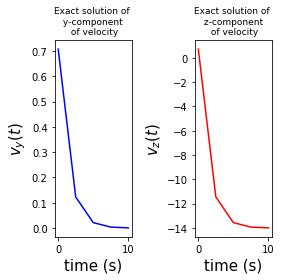

In [30]:
# Plot usiing the OO method
width = 4
height = 4
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(width,height))

axes[0].plot(time_grid,exact_projectile[0],'b')
axes[0].set_xlabel('time (s)', fontsize=15)
axes[0].set_ylabel('$v_{y}(t)$', fontsize=15)
axes[0].set_title('Exact solution of \n y-component \n of velocity', fontsize=9)

axes[1].plot(time_grid,exact_projectile[1],'r')
axes[1].set_xlabel('time (s)', fontsize=15)
axes[1].set_ylabel('$v_{z}(t)$', fontsize=15)
axes[1].set_title('Exact solution of \n z-component \n of velocity', fontsize=9)
plt.tight_layout()

# Solution via Runge-Kutta

In [75]:
# Common Function
def fnuv(u,v,n):
    t1 = u**2 + v**2
    t2 = t1**((n-1)/2)
    return(t2)

In [76]:
# Define the two fucntions on the right hand side
def FRHS(u,v,mass,beta,n):
    t1 = (-beta/mass)*fnuv(u,v,n)*u
    return(t1)

In [77]:
def GRHS(u,v,mass,beta,n):
    g = 9.8 # ms^-2
    t1 = -g - (beta/mass)*fnuv(u,v,n)*v
    return(t1)

In [78]:
# RUnge-Kutta implementation
def dsolve_projectile(mass,beta,n,v0,alpha,tmin,tmax,NGrid):
    # mass: mass of object
    # beta: drag coefficient
    # n: order of drag force
    # v0: initial velocity
    # alpha: initial angle (in radians)
    #tmin,tmax: minimum and maximum values of time grid
    # NGrid: number of grid points on time grid
    
    # Define the time grid
    time_grid = np.linspace(tmin,tmax,NGrid)
    h = time_grid[1] - time_grid[0]
    
    # Define the arrays which hold the functions u and v
    u = np.zeros(NGrid)
    v = np.zeros(NGrid)
    
    # Define the initial values to start R-K algorithm
    u[0] = v0*np.cos(alpha)
    v[0] = v0*np.sin(alpha)
    
    # for loop for R-K algorithm
    
    for i in range(0,NGrid-1):
        k1 = h*FRHS(u[i],v[i],mass,beta,n)
        l1 = h*GRHS(u[i],v[i],mass,beta,n)
        
        k2 = h*FRHS(u[i] + 0.5*k1,v[i] + 0.5*l1,mass,beta,n)
        l2 = h*GRHS(u[i] + 0.5*k1,v[i] + 0.5*l1,mass,beta,n)
        
        k3 = h*FRHS(u[i] + 0.5*k2,v[i] + 0.5*l2,mass,beta,n)
        l3 = h*GRHS(u[i] + 0.5*k2,v[i] + 0.5*l2,mass,beta,n)
        
        
        k4 = h*FRHS(u[i] + k3,v[i] + l3,mass,beta,n)
        l4 = h*GRHS(u[i] + k3,v[i] + l3,mass,beta,n)
        
        u[i+1] = u[i] + k1/6.0 + k2/3.0 + k3/3.0 + k4/6.0
        v[i+1] = v[i] + l1/6.0 + l2/3.0 + l3/3.0 + l4/6.0
    return u,v

In [86]:
# Define all the parameters
# Calculate the exact solution as an array
mass = 1.0 # kg
beta = 0.7
n = 1  # order of the drag force
v0 = 1.0 # m/s
alpha = np.pi/4
tmin = 0.0 # s
tmax = 10.0 # s
NGrid = 15
time_grid = np.linspace(tmin,tmax,NGrid)
exact_projectile = exact_solution(mass,beta,v0,alpha,tmin,tmax,NGrid)
RK4_solution = dsolve_projectile(mass,beta,n,v0,alpha,tmin,tmax,NGrid)

In [80]:
RK4_solution


(array([7.07106781e-01, 4.29051771e-01, 2.60336101e-01, 1.57964353e-01,
        9.58481619e-02, 5.81578691e-02, 3.52884987e-02, 2.14120318e-02,
        1.29921964e-02, 7.88328581e-03, 4.78334790e-03, 2.90239599e-03,
        1.76108923e-03, 1.06857758e-03, 6.48381710e-04]),
 array([  0.70710678,  -5.07615656,  -8.58527208, -10.71450103,
        -12.00645505, -12.79037507, -13.26603487, -13.55465137,
        -13.72977544, -13.83603562, -13.9005112 , -13.9396331 ,
        -13.96337112, -13.97777467, -13.98651432]))

In [81]:
RK4_solution[0]

array([7.07106781e-01, 4.29051771e-01, 2.60336101e-01, 1.57964353e-01,
       9.58481619e-02, 5.81578691e-02, 3.52884987e-02, 2.14120318e-02,
       1.29921964e-02, 7.88328581e-03, 4.78334790e-03, 2.90239599e-03,
       1.76108923e-03, 1.06857758e-03, 6.48381710e-04])

In [82]:
RK4_solution[1]

array([  0.70710678,  -5.07615656,  -8.58527208, -10.71450103,
       -12.00645505, -12.79037507, -13.26603487, -13.55465137,
       -13.72977544, -13.83603562, -13.9005112 , -13.9396331 ,
       -13.96337112, -13.97777467, -13.98651432])

In [92]:
# Compare the exact solution with the Runge-Kutta solution
mass = 1.0 # kg
beta = 0.7
n = 1  # order of the drag force
v0 = 1.0 # m/s
alpha = np.pi/4
tmin = 0.0 # s
tmax = 10.0 # s
NGrid = 5
time_grid = np.linspace(tmin,tmax,NGrid)
exact_projectile = exact_solution(mass,beta,v0,alpha,tmin,tmax,NGrid)
RK4_solution = dsolve_projectile(mass,beta,n,v0,alpha,tmin,tmax,NGrid)

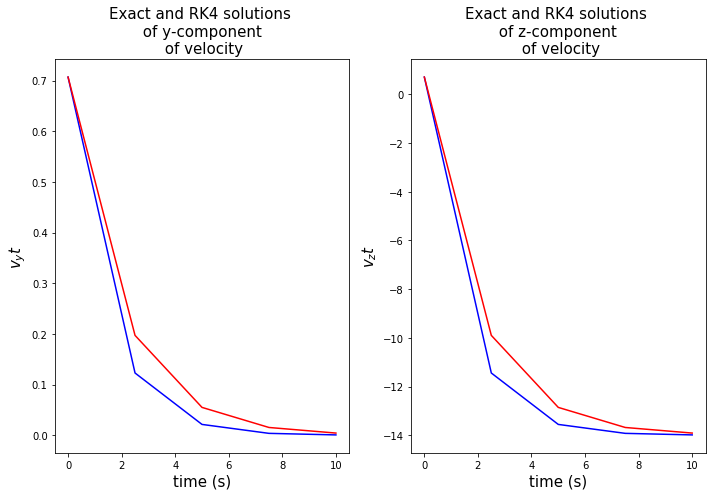

In [93]:
# Create subplot using the OO method
# To see the difference, decrease the grid size

width = 10
height = 7
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(width,height))

axes[0].plot(time_grid,exact_projectile[0],'b',time_grid,RK4_solution[0],'r')
axes[0].set_xlabel('time (s)',fontsize=15)
axes[0].set_ylabel('$v_{y}t$',fontsize=15)
axes[0].set_title('Exact and RK4 solutions \n of y-component \n of velocity',fontsize=15)

axes[1].plot(time_grid,exact_projectile[1],'b',time_grid,RK4_solution[1],'r')
axes[1].set_xlabel('time (s)',fontsize=15)
axes[1].set_ylabel('$v_{z}t$',fontsize=15)
axes[1].set_title('Exact and RK4 solutions \n of z-component \n of velocity',fontsize=15)

plt.tight_layout()

# Using built-in ODE solver

In [94]:
# Define the RHS of the system of ODEs
def projectile_odeint(state,t,mass,beta,n,g):
    # mass
    # beta: drag coefficient
    # n: order of drag coefficient
    # g: gravitational acceleration
    # State: the initial state as a one-dimensional array (be careful!)
    # time: t must be an array (be careful!)
    
    # Define the initial values for the two functions
    u,v = state
    
    # Define the RHS
    du_dt = (-beta/mass)*fnuv(u,v,n)*u
    dv_dt = -g -(beta/mass)*fnuv(u,v,n)*v
    
    return [du_dt,dv_dt]

In [96]:
mass = 1.0
beta = 0.7
v0 = 1.0
alpha = np.pi/4
tmin = 0.0
tmax = 10.0
NGrid = 10
n = 1  # order of drag coefficient
g = 9.8
init_state = [v0*np.cos(alpha),v0*np.sin(alpha)] # initial state
time_grid = np.linspace(tmin,tmax,NGrid)
state = odeint(projectile_odeint,init_state,time_grid,args=(mass,beta,n,g))

In [98]:
len(state)

10

In [99]:
state

array([[ 7.07106781e-01,  7.07106781e-01],
       [ 3.24863114e-01, -7.24317538e+00],
       [ 1.49250500e-01, -1.08957404e+01],
       [ 6.85695360e-02, -1.25738229e+01],
       [ 3.15026176e-02, -1.33447774e+01],
       [ 1.44731172e-02, -1.36989738e+01],
       [ 6.64932440e-03, -1.38617008e+01],
       [ 3.05487162e-03, -1.39364618e+01],
       [ 1.40348730e-03, -1.39708089e+01],
       [ 6.44797361e-04, -1.39865889e+01]])

In [100]:
# Extract the funtion u(t)
# Note syntax
state[:,0]

array([7.07106781e-01, 3.24863114e-01, 1.49250500e-01, 6.85695360e-02,
       3.15026176e-02, 1.44731172e-02, 6.64932440e-03, 3.05487162e-03,
       1.40348730e-03, 6.44797361e-04])

In [102]:
# Extract the function v(t)
# Note the syntax
state[:,1]

array([  0.70710678,  -7.24317538, -10.89574036, -12.57382292,
       -13.34477738, -13.69897378, -13.86170077, -13.93646176,
       -13.97080888, -13.98658887])

# Plotting the exact with ODE 

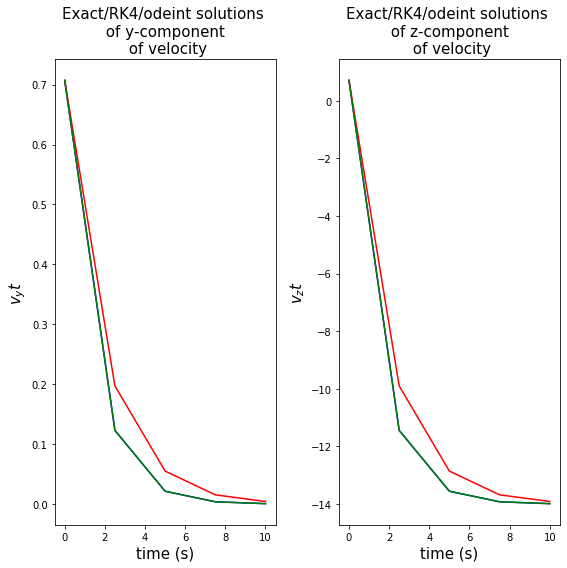

In [108]:
# Plot using the exact, RK4 and odeint solutions using OO
# To see differences, decrease the grid size

# Define the parameters of this problem

mass = 1.0
beta = 0.7
v0 = 1.0
alpha = np.pi/4
tmin = 0.0
tmax = 10.0
NGrid = 5
n = 1  # order of drag coefficient
g = 9.8
width = 10
height = 7
time_grid = np.linspace(tmin,tmax,NGrid)

# Exact solution
exact_projectile = exact_solution(mass,beta,v0,alpha,tmin,tmax,NGrid)

# RK4 Solution
RK4_solution = dsolve_projectile(mass,beta,n,v0,alpha,tmin,tmax,NGrid)

#Odeint solution
init_state = [v0*np.cos(alpha),v0*np.sin(alpha)] # initial state
time_grid = np.linspace(tmin,tmax,NGrid)
state = odeint(projectile_odeint,init_state,time_grid,args=(mass,beta,n,g))

width = 8
height = 8
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(width,height))


axes[0].plot(time_grid,exact_projectile[0],'b',
             time_grid,RK4_solution[0],'r',
             time_grid,state[:,0],'g')
axes[0].set_xlabel('time (s)',fontsize=15)
axes[0].set_ylabel('$v_{y}t$',fontsize=15)
axes[0].set_title('Exact/RK4/odeint solutions \n of y-component \n of velocity',fontsize=15)

axes[1].plot(time_grid,exact_projectile[1],'b',
             time_grid,RK4_solution[1],'r',
             time_grid,state[:,1],'g')
axes[1].set_xlabel('time (s)',fontsize=15)
axes[1].set_ylabel('$v_{z}t$',fontsize=15)
axes[1].set_title('Exact/RK4/odeint solutions \n of z-component \n of velocity',fontsize=15)

plt.tight_layout()